# Network EDA

The following notebook will perform an EDA on the creating of the graph including graph structure and features.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import networkx as nx

In [4]:
#Read in data
node_data = pd.read_parquet("data/node_attributes.parquet")
edge_data = pd.read_parquet("data/edges_single.parquet")
display(node_data.head())
display(edge_data.head())

,user_id,review_count,useful,funny,cool,fans,average_stars,total_compliments,days_since_yelping,years_elite,years_since_elite,Health_Beauty_Rec,Food_Dining,Shopping_Retail,Home_Services,Professional_Services,Arts_Entertainment_Party,Public_Transportation_Education,Other
0,-0xXVMZDcGw_PZMNMFOo2w,6,4,0,2,0,5.00,171,2502,0,17.0,0,0,0,0,0,0,0,1
1,-3i9bhfvrM3F1wsC9XIB8g,747,3938,2456,3314,109,4.14,3455,5953,16,0.0,0,2,0,0,0,3,2,0
2,-8Uj3PXAO-RoGz9yFupqDA,43,102,17,42,4,4.22,418,5966,0,17.0,0,1,0,0,0,1,0,0
3,-9da1xk7zgnnfO1uTVYGkA,1438,23965,16699,22215,293,4.14,33870,3520,11,0.0,0,6,1,0,0,1,2,0
4,-AKbx6qFJRw0NEcPiwovDg,46,13,1,5,0,4.41,277,1553,0,17.0,0,4,0,0,0,1,0,0


,source,target
0,--17Db1K-KujRuN7hY9Z0Q,REnIBVutnk7CBmy8auVGqg
1,--17Db1K-KujRuN7hY9Z0Q,bGu1K8WWpAWpYPCjFttiDg
2,--17Db1K-KujRuN7hY9Z0Q,ggl6fl-PM5O1WrdReL0l4A
3,uIv-QohIyddQA6JMXWsaTA,--17Db1K-KujRuN7hY9Z0Q
4,--238OiSJBDIhfqcSOQyMA,_jfMNGIbiYgyY6HEfREjXw


In [10]:
G = nx.Graph()

# Step 3: Add nodes to the graph with attributes
for idx, row in node_data.iterrows():
    node_id = row['user_id']  # Assuming 'node_id' is the column name for node IDs
    attributes = {col: row[col] for col in node_data.columns if col != 'node_id'}  # Assuming other columns are node attributes
    G.add_node(node_id, **attributes)
    
print("done with nodes\n")

# Step 4: Add edges to the graph
for idx, row in edge_data.iterrows():
    source_node = row['source']  # Assuming 'source_node' is the column name for the source node ID
    target_node = row['target']  # Assuming 'target_node' is the column name for the target node ID
    G.add_edge(source_node, target_node)
    if idx%100000 == 0:
        print(idx)

done with nodes

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000


In [40]:
# Initialize an empty dictionary to store node data
data = {}

# Initialize with node IDs and degree
data['node'] = list(G.nodes())
data['degree'] = [G.degree(n) for n in G.nodes()]

# Loop through each node in the subgraph
for n in G.nodes(data=True):
    node, attr = n
    # Loop through each attribute in the node's data
    for key, value in attr.items():
        # Check if the attribute already exists in the dictionary
        if key == "user_id":
            continue
        if key not in data:
            # If not, create a new list in the dictionary for this attribute
            data[key] = []
        # Append the attribute value to the correct list in the dictionary
        data[key].append(value)

# Some nodes might not have all attributes, fill missing values
features = pd.DataFrame(data).fillna(method='ffill')
#features = features.drop("user_id")

# Display the first few rows of the DataFrame to confirm
print(features.head())

                     node  degree  review_count  useful  funny   cool  fans  \
0  -0xXVMZDcGw_PZMNMFOo2w       4             6       4      0      2     0   
1  -3i9bhfvrM3F1wsC9XIB8g     167           747    3938   2456   3314   109   
2  -8Uj3PXAO-RoGz9yFupqDA      30            43     102     17     42     4   
3  -9da1xk7zgnnfO1uTVYGkA     127          1438   23965  16699  22215   293   
4  -AKbx6qFJRw0NEcPiwovDg       1            46      13      1      5     0   

   average_stars  total_compliments  days_since_yelping  years_elite  \
0           5.00                171                2502            0   
1           4.14               3455                5953           16   
2           4.22                418                5966            0   
3           4.14              33870                3520           11   
4           4.41                277                1553            0   

   years_since_elite  Health_Beauty_Rec  Food_Dining  Shopping_Retail  \
0               17.

/tmp/ipykernel_137842/742806122.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = pd.DataFrame(data).fillna(method='ffill')


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


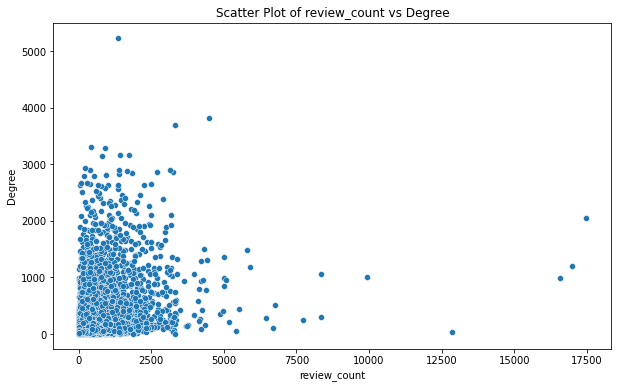

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


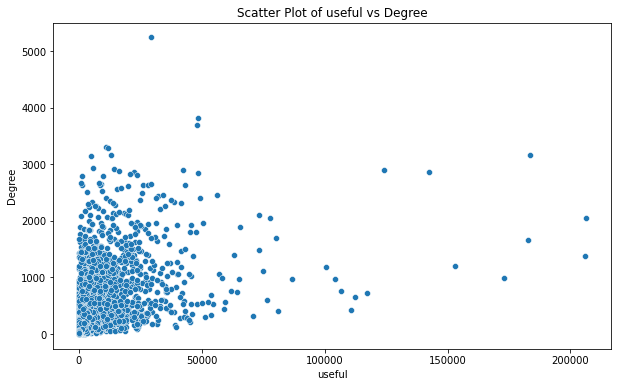

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


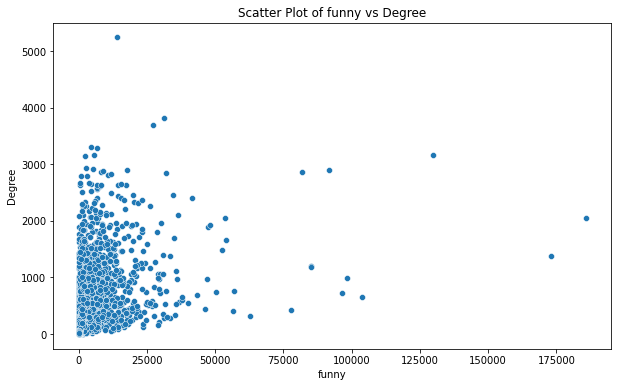

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


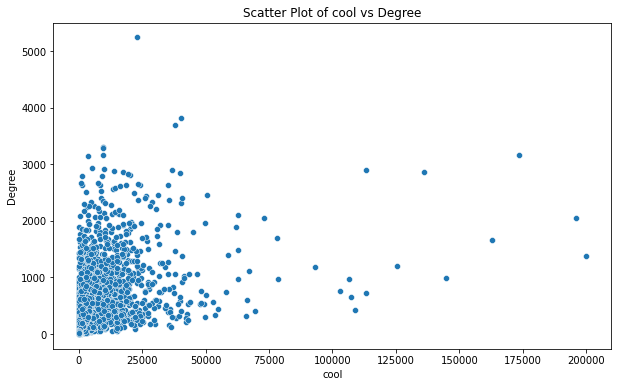

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


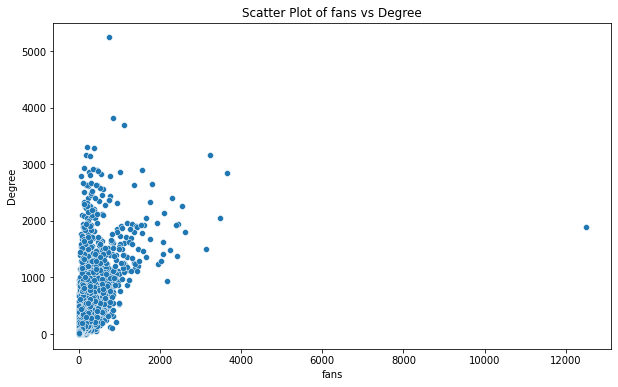

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


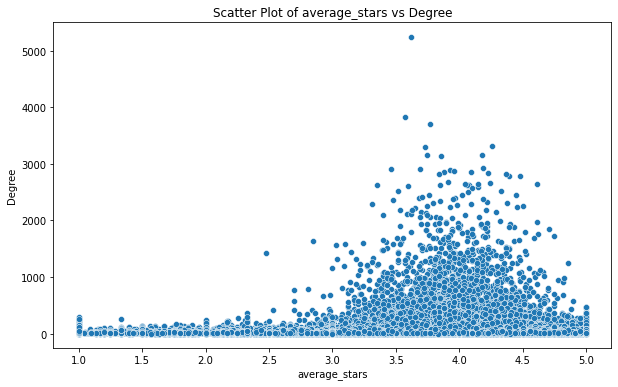

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


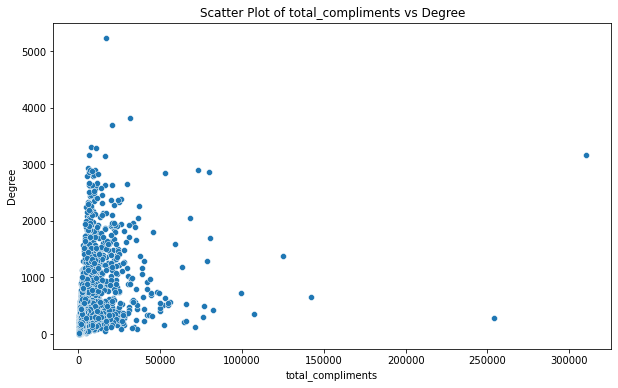

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


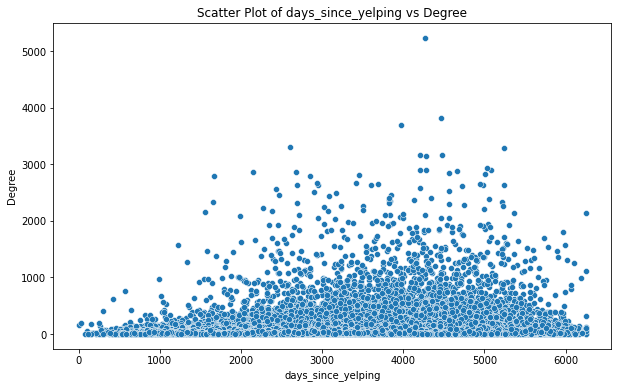

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


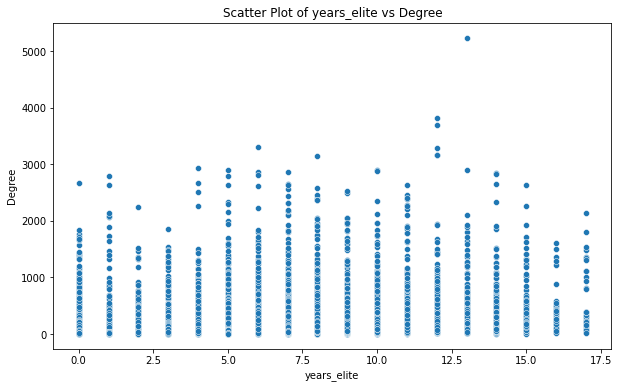

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


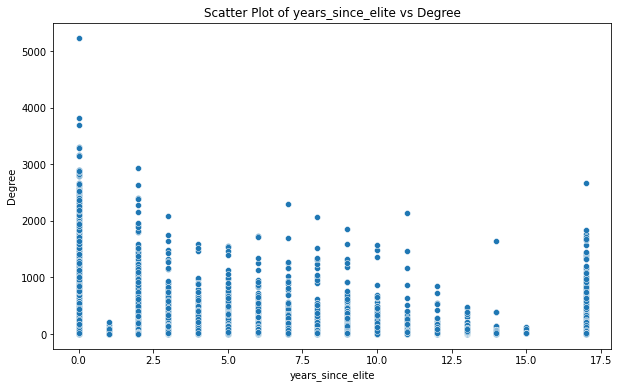

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


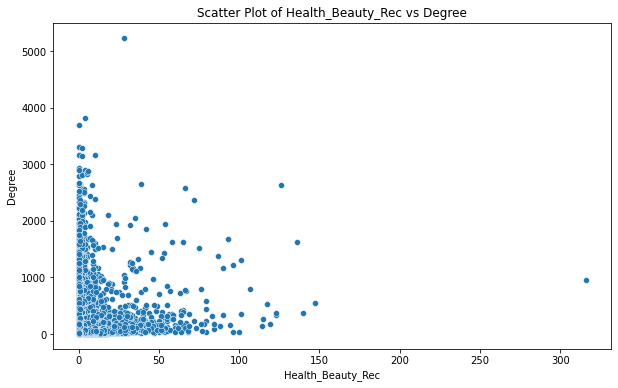

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


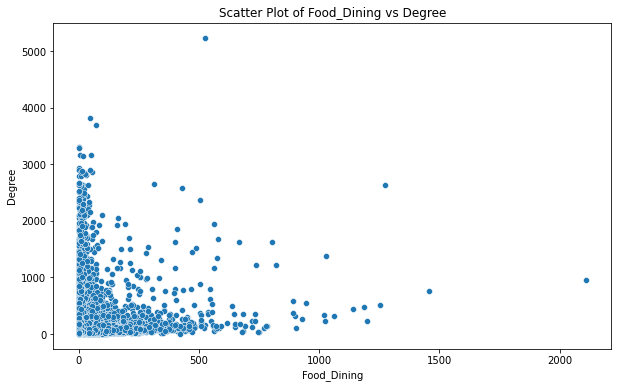

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


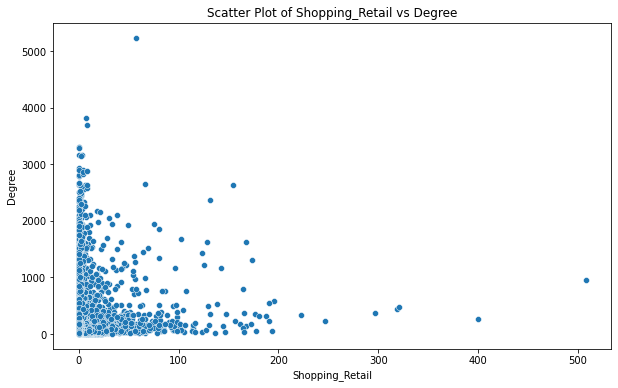

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


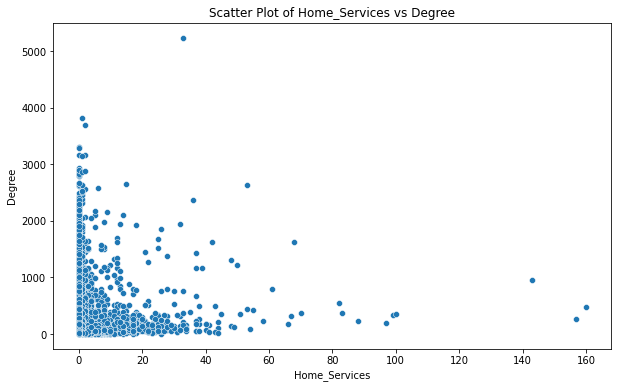

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


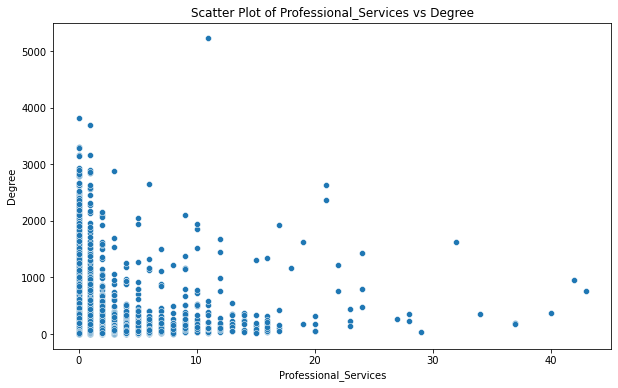

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


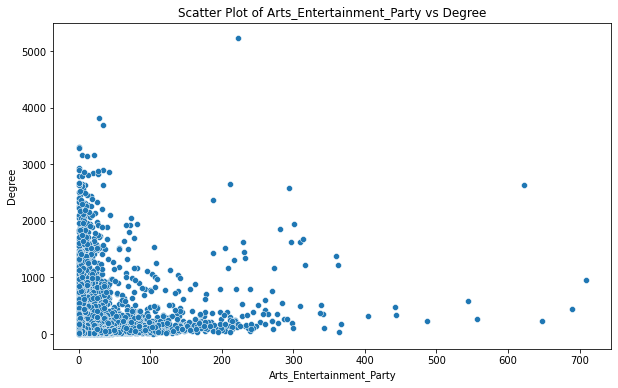

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


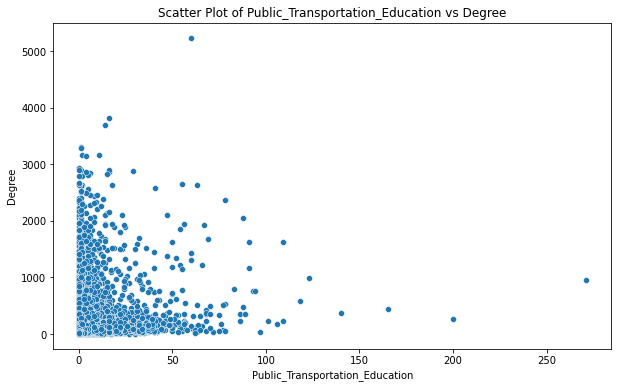

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


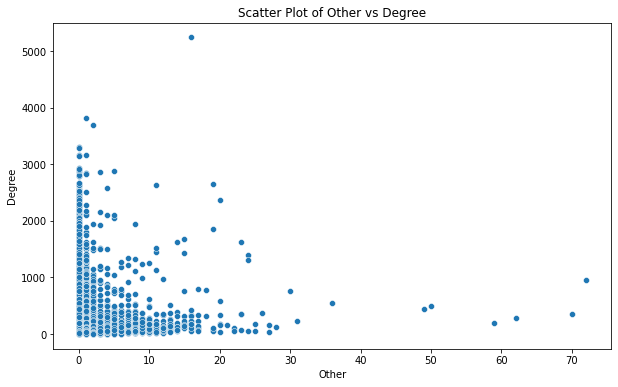

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'features' is the DataFrame from your earlier steps

# Identify numeric columns (excluding 'degree' to avoid plotting it against itself)
numeric_columns = features.select_dtypes(include=[np.number]).columns.tolist()
if 'degree' in numeric_columns:
    numeric_columns.remove('degree')

# Generate scatter plots for each numeric attribute against 'degree'
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=features, x=column, y='degree')
    plt.title(f'Scatter Plot of {column} vs Degree')
    plt.xlabel(column)
    plt.ylabel('Degree')
    plt.show()

# Calculate correlations of all numeric attributes with 'degree'
# Create a DataFrame for better visualization
degree_corr = features[numeric_columns + ['degree']].corr()['degree'][:-1]  # Exclude the last row to drop degree-degree correlation


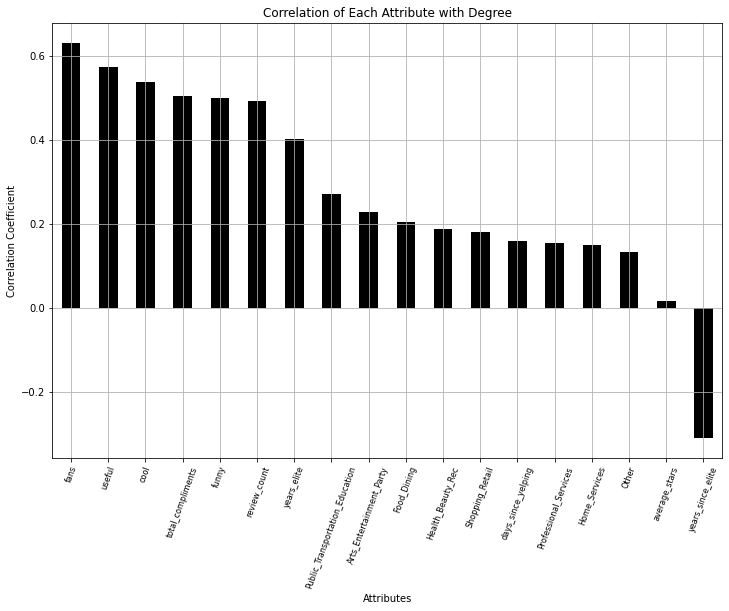

In [51]:
# Display the correlation values as a bar plot
sorted_degree_corr = degree_corr.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sorted_degree_corr.plot(kind='bar', color='black')
plt.title('Correlation of Each Attribute with Degree')
plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=70, fontsize = 8)
plt.grid(True)
plt.savefig("Images/Feature_corelation.png")
plt.show()